## Исследование объявлений о продаже квартир

Цель: нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. Входные данные - архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

### Вывод

- в центре Санкт-Петербурга квартиры не только дороже, но и больше, по метражу, количеству комнат, а потолки выше.
- и для Лен. области и для центра Питера правдиво утверждение, что цена за квадратный метр зависит от количества комнат. Чем меньше комнат, тем выше ценник. В центре Питера корреляция по этому признаку более устойчивая.
- для квартир в области верно утверждение, что чем ближе к центру, тем выше цена за квадратный мерт. Но мы не можем сказать того же самого про центр Питера. Там это правило не работает.
- взаимосвязи между датой публикации объявления о продаже квартиры и ценой не выявлено ни для Санкт-Петербурга, ни для Лен. области. Единственное, что прослеживается - это медленный рост цен на недвижимость с течением времени.
- самые высокие цены на недвижимость разумеется в Санкт-Петербурге и Пушкине, а самое дешёвое жильё можно приобрести в Выборге.


### Ключевые понятия

Matplotlib, Pandas, Python, визуализация данных, исследовательский анализ данных, предобработка данных.

### План выполнения проекта


1. [Предобработка данных](#step1)


- определим и изучим пропущенные значения;
- заполним пропуски, где это уместно;
- укажим причины, которые могли привести к пропускам в данных;
- приведем данные к нужным типам.


2. [Посчитаем и добавим в таблицу](#step2)


- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры: первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.


3. [Проведём исследовательский анализ данных](#step3)


- изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.
- изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишим, сколько обычно занимает продажа. 
- уберём редкие и выбивающиеся значения.
- изучим, зависит ли цена от квадратного метра, числа комнат, удалённости от центра, того, на каком этаже расположена квартира, от даты размещения.
- выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.
- выясним какая зона входит в центр Санкт-Петербурга.
- выделим сегмент квартир в центре.

### Описание данных:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Откроем файл с данными и изучим общую информацию

In [1]:
# импортируем все библиотеки, которые понадобятся нам для работы
import pandas as pd
import matplotlib.pyplot as plt

Данные склеились в одну строку вместо того, чтобы разбиться по колонкам. Это произошло из-за разделителей в формате csv. 
Для разделения используем функцию read_csv() с параметром sep.

In [2]:
data_estate = pd.read_csv('/home/ilya/Desktop/Datasets/real_estate_data.csv', sep='\t')
data_estate.info()
display(data_estate.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


В таблице 23699 строк и 22 столбца. Тип данных в таблице: bool(2 столбца), float64(14 столбцов), int64(3 столбца), object(3 столбца). 

В таблице достаточно много пропусков:
- ceiling_height продавец в объявлении действительно мог не указать высоту потолков, укажем медианные значения;
- floors_total в небольшом количестве объявлений не указано количество этажей в доме. Очевидно что этажность домов зависит от населенного пункта. В Спб дома выше, в обсласти ниже. Укажем медианные значения для этих групп;
- living_area в небольшом количестве объявлений не указана жилая площадь. Заполним эти пропуски медианой в зависимости от того, сколько комнат в квартире;
- is_apartment пропуск показывает, что эта недвижимость не является аппартаментами. Заменим все пропуски на False;
- kitchen_area заполним эти пропуски медианой в зависимости от того, сколько комнат в квартире;
- balcony примерно в 50% объявлений отсутсвует информация о балконах. Вероятно, их просто нет. Поставим нули.
- locality_name в 49 объявлениях не указано название населенного пункта, что достаточно странно. Выяснить эту информацию не представляется возможным, поэтому заполним эти пропуски текстом "пункт не указан";
- airports_nearest для квартир расположенных в Спб заполним этот пропуск соответствующей медианой, тоже самое сделаем для недвижимости, расположенной в Лен. области;
- cityCenters_nearest данные этого столбца получены автоматически на основе картографических данных. Заполним эти пропуски медианными значениями применительно к каждому населенному пункту;
- parks_around3000 если на расстоянии 3 км нет парков, столбец остаётся незаполненным. Данный столбец в анализе не участвует, пропуски заполнять не будем;
- parks_nearest если в населенном пункте нет парков, столбец остаётся незаполненным. Данный столбец в анализе не участвует, пропуски заполнять не будем;
- ponds_around3000 если на расстоянии 3 км нет водоёмов, столбец остаётся незаполненнымю Данный столбец в анализе не участвует, пропуски заполнять не будем;
- ponds_nearest если в населенном пункте нет водоёмов, столбец остаётся незаполненным. Данный столбец в анализе не участвует, пропуски заполнять не будем;
- days_exposition нам выдали архив, а это значит, что эта информация быть должна. Скорость продажи квартр зачастую зависит от количества комнат. Например однокомнатные квартиры всегда продаются быстрее. Рассчитаем медиану в зависимости от количества комнат и заполним пропуски.

### Предобработка данных <a id="step1"></a>   

In [3]:
# вычислим медиану высоты потолков и присвоим её значение пропускам в столбце ceiling_height.
data_estate_ceiling = data_estate['ceiling_height'].median()
data_estate_ceiling

2.65

In [4]:
data_estate['ceiling_height'] = data_estate['ceiling_height'].fillna(value=2.65)
# отсутствующие значения в столбце balcony заменим на нули
data_estate['balcony'] = data_estate['balcony'].fillna(value=0)
# отсутствующие значения в столбце is_apartment заменим на False
data_estate['is_apartment'] = data_estate['is_apartment'].fillna(value='False')
# отсутствующие значения в столбце locality_name заменим на 'пункт не указан'
data_estate['locality_name'] = data_estate['locality_name'].fillna(value='пункт не указан')

In [5]:
# убедимся, что пропуски в столбцах заполнены
data_estate['ceiling_height'].isnull().sum()
data_estate['balcony'].isnull().sum()
data_estate['is_apartment'].isnull().sum()
data_estate['locality_name'].isnull().sum()

0

In [6]:
# методом query() создадим 2 датафрейма: для Спб и Лен. области
data_estate_spb = data_estate.query('locality_name == "Санкт-Петербург"')
data_estate_region = data_estate.query('locality_name != "Санкт-Петербург"')
# убедимся, что срез выполнен верно
display(data_estate_spb.head(10))
display(data_estate_region.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,False,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,False,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
10,5,5050000.0,39.6,2017-11-16T00:00:00,1,2.67,12.0,20.3,3,False,...,8.5,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
15,16,4650000.0,39.0,2017-11-18T00:00:00,1,2.65,14.0,20.5,5,False,...,7.6,1.0,Санкт-Петербург,12900.0,14259.0,1.0,590.0,1.0,296.0,19.0
16,11,6700000.0,82.0,2017-11-23T00:00:00,3,3.05,5.0,55.6,1,False,...,9.0,0.0,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0
17,6,4180000.0,36.0,2016-09-09T00:00:00,1,2.65,17.0,16.5,7,False,...,11.0,1.0,Санкт-Петербург,33564.0,14616.0,0.0,NaN,1.0,859.0,571.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
11,9,3300000.0,44.00,2018-08-27T00:00:00,2,2.65,5.0,31.00,4,False,...,6.00,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5.0,30.00,5,False,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
13,20,3550000.0,42.80,2017-07-01T00:00:00,2,2.56,5.0,27.00,5,False,...,5.20,1.0,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0
14,1,4400000.0,36.00,2016-06-23T00:00:00,1,2.65,6.0,17.00,1,False,...,8.00,0.0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0
20,12,6120000.0,80.00,2017-09-28T00:00:00,3,2.70,27.0,48.00,11,False,...,12.00,2.0,посёлок Парголово,53134.0,19311.0,0.0,NaN,0.0,NaN,74.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0


In [7]:
# методом loc проведём логическую индексацию и присвоим пропущенным значениям медиану этажности домов 
# в Санкт-Петербурге и Лен. области
data_estate.loc[data_estate['locality_name'] == 'Санкт-Петербург', 'floors_total'] = data_estate.loc[
data_estate['locality_name'] == 'Санкт-Петербург', 'floors_total'].fillna(data_estate_spb[
'floors_total'].median())
data_estate.loc[data_estate['locality_name'] != 'Санкт-Петербург', 'floors_total'] = data_estate.loc[
data_estate['locality_name'] != 'Санкт-Петербург', 'floors_total'].fillna(data_estate_region[
'floors_total'].median())

In [8]:
# проверим, есть ли ситуации в данных, когда этаж квартиры больше, чем общее число этажей дома
data_estate[data_estate['floor'] > data_estate['floors_total']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
457,4,9788348.0,70.80,2015-08-01T00:00:00,2,2.65,9.0,38.40,12,False,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
2392,7,5395770.0,53.00,2017-06-29T00:00:00,2,2.65,9.0,29.00,22,False,...,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000.0,27.80,2016-09-21T00:00:00,1,2.65,9.0,19.40,15,False,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
3031,9,6400000.0,56.70,2018-03-27T00:00:00,2,2.65,5.0,32.00,12,False,...,12.00,0.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0
3438,10,4100000.0,38.00,2018-04-14T00:00:00,1,2.65,5.0,19.00,12,False,...,10.30,0.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,95.0
4617,4,4275062.0,61.20,2017-04-27T00:00:00,2,2.65,9.0,32.00,12,False,...,12.20,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,72.0
4848,15,13000000.0,98.00,2017-02-08T00:00:00,3,2.65,9.0,NaN,18,False,...,NaN,0.0,Санкт-Петербург,37625.0,14153.0,0.0,NaN,0.0,NaN,29.0
4901,5,2200000.0,24.00,2018-10-22T00:00:00,0,2.65,5.0,NaN,6,False,...,NaN,0.0,посёлок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,51.0
5146,10,3085024.0,33.33,2018-10-06T00:00:00,1,2.65,9.0,11.00,12,False,...,NaN,0.0,Санкт-Петербург,47303.0,25865.0,1.0,400.0,1.0,492.0,140.0
5187,5,3300000.0,25.40,2018-11-02T00:00:00,0,2.65,5.0,NaN,15,False,...,NaN,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,3.0


В 38 случаях, у нас этаж квартиры получился больше, чем количесво этажей в доме. Однако, вспомним, что в нашем датасете 23699 строк и такая погрешность не критична. Более того, не ясно какими значениями заменить данный этаж. Если мы произведем замену, на 1-й, последний или другой этаж, то это также окажет влияние на анализ зависимости цены за 1 кв.м. от этажа квартиры. В связи с чем, замену производить нецелесообразно.

In [9]:
# убедимся, что пропуски в столбце заполнены
data_estate['floors_total'].isnull().sum()

0

In [10]:
# вычислим медиану жилой площади в зависимости от количества комнат
data_estate_living_area = data_estate.groupby('rooms')['living_area'].median().sort_values()
display(data_estate_living_area)

rooms
1      17.600
0      18.000
2      30.500
3      45.000
4      63.600
5      91.785
6     123.900
11    133.900
7     145.000
8     161.000
10    161.400
9     179.200
16    180.000
14    195.150
19    264.500
15    409.000
12    409.700
Name: living_area, dtype: float64

In [11]:
#Создаем функцию, которая принимает датасет и количество комнат, после чего заменяет пустые значения на медианные
def fill_by_median(data_estate, rooms_count):
    data_estate.loc[data_estate['rooms'] == rooms_count,'living_area'] = data_estate.loc[data_estate['rooms'] == 
rooms_count,'living_area'].fillna(data_estate_living_area[rooms_count])
    
# Применяем функцию
fill_by_median(data_estate, 1)

fill_by_median(data_estate, 0)

fill_by_median(data_estate, 2)

fill_by_median(data_estate, 3)

fill_by_median(data_estate, 4)

fill_by_median(data_estate, 5)

fill_by_median(data_estate, 6)

fill_by_median(data_estate, 11)

fill_by_median(data_estate, 7)

fill_by_median(data_estate, 8)

fill_by_median(data_estate, 10)

fill_by_median(data_estate, 9)

fill_by_median(data_estate, 16)

fill_by_median(data_estate, 14)

fill_by_median(data_estate, 19)

fill_by_median(data_estate, 15)

fill_by_median(data_estate, 12)

In [12]:
data_estate['living_area'].isnull().sum()

0

In [13]:
# вычислим медиану площади кухни в зависимости от количества комнат
data_estate_kitchen_area = data_estate.groupby('rooms')['kitchen_area'].median().sort_values()
display(data_estate_kitchen_area)

rooms
2       8.80
1       9.04
3       9.50
4      11.10
11     12.60
16     13.00
9      14.30
5      15.10
6      19.50
10     19.80
7      20.00
14     21.25
8      25.00
19     27.60
15    100.00
12    112.00
0        NaN
Name: kitchen_area, dtype: float64

In [14]:
#Создаем функцию, которая принимает датасет и количество комнат, после чего заменяет пустые значения на медианные
def fill_by_median(data_estate, rooms_count):
    data_estate.loc[data_estate['rooms'] == rooms_count,'kitchen_area'] = data_estate.loc[data_estate['rooms'] == 
rooms_count,'kitchen_area'].fillna(data_estate_kitchen_area[rooms_count])
    
# Применяем функцию
fill_by_median(data_estate, 2)

fill_by_median(data_estate, 1)

fill_by_median(data_estate, 3)

fill_by_median(data_estate, 4)

fill_by_median(data_estate, 11)

fill_by_median(data_estate, 16)

fill_by_median(data_estate, 9)

fill_by_median(data_estate, 5)

fill_by_median(data_estate, 6)

fill_by_median(data_estate, 10)

fill_by_median(data_estate, 7)

fill_by_median(data_estate, 14)

fill_by_median(data_estate, 8)

fill_by_median(data_estate, 19)

fill_by_median(data_estate, 15)

fill_by_median(data_estate, 12)

fill_by_median(data_estate, 0)

#обратим внимание, что при 0 комнат медиана не вычислена.

In [15]:
data_estate['kitchen_area'].isnull().sum()
# осталось 197 пропусков из 2278. Будем считать, что в данном случае кухня отсутствует, 
# присвоим этим пропускам значение 0.

197

In [16]:
data_estate['kitchen_area'] = data_estate['kitchen_area'].fillna(value=0)
data_estate['kitchen_area'].isnull().sum()

0

In [17]:
# вычислим медиану удаленности аэропорта от объекта недвижимости в Спб и Лен. области
print(data_estate_spb['airports_nearest'].median())
print(data_estate_region['airports_nearest'].median())
# стоит отметить, что медианы практически не отличаются. 
# Это объясняется тем, кто аэропорты практически всегда расположены на окраине города, и Питер не исключение.
# В большинстве случаев до аэропорта долго добираться практически из любой точки города или области.

26757.5
26599.0


In [18]:
# методом loc проведём логическую индексацию и присвоим пропущенным значениям медиану удаленности аэропорта 
# в Санкт-Петербурге и Лен. области
data_estate.loc[data_estate['locality_name'] == 'Санкт-Петербург', 'airports_nearest'] = data_estate.loc[
data_estate['locality_name'] == 'Санкт-Петербург', 'airports_nearest'].fillna(data_estate_spb[
'airports_nearest'].median())
data_estate.loc[data_estate['locality_name'] != 'Санкт-Петербург', 'airports_nearest'] = data_estate.loc[
data_estate['locality_name'] != 'Санкт-Петербург', 'airports_nearest'].fillna(data_estate_region[
'airports_nearest'].median())

In [19]:
# убедимся, что пропуски в столбце заполнены
data_estate['airports_nearest'].isnull().sum()

0

Изучив данные столбца "cityCenters_nearest" можно сделать вывод о том, что под центом города понимается центр Питера. Это подтверждается тем, что в населенном пункте Петергоф расстояние до центра 33 км, Пушкин 30 км, а Ломоносов 48 км. 
На основании этого, целесообразно заполнить пропуски медианами для каждого населенного пункта. Проблема в том, что для некоторых поселков нет вообще данных о расстоянии до центра. Для них мы присвоим медиану всего датафрейма.

In [20]:
def centers_distance_fillna(name):
    distance_list = data_estate[data_estate['cityCenters_nearest'].notna()]['locality_name'].unique()
    if name in distance_list:
        median_value = data_estate[data_estate['locality_name'] == name]['cityCenters_nearest'].median()
    else:
        median_value = data_estate['cityCenters_nearest'].median()
    data_estate.loc[(data_estate['locality_name'] == name)\
                    & (data_estate['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = median_value

In [21]:
for name in data_estate['locality_name'].unique():
    centers_distance_fillna(name)

In [22]:
# убедимся, что пропуски в столбце заполнены
data_estate['cityCenters_nearest'].isnull().sum()

0

In [23]:
# Скорость продажи квартр зачастую зависит от количества комнат. 
# Например однокомнатную квартиру продать проще чем трехкомнатную
# Проверим данное предположение
data_estate_sales_rate = data_estate.groupby('rooms')['days_exposition'].median().sort_values()
data_estate_sales_rate
# Рассчитаем медиану в зависимости от количества комнат и заполним пропуски.

rooms
15      14.0
10      44.0
0       50.0
1       81.0
2       91.0
12     106.0
19     114.0
3      114.0
7      138.0
4      156.0
5      185.5
6      201.5
8      249.0
14     256.5
9      469.5
11     813.0
16    1365.0
Name: days_exposition, dtype: float64

In [24]:
# Мы видим, что быстрее всего продаются квартиры с 15 и 10 комнатами. 
# В то же время очевдно, что таких квартир очень мало.
# Если отбросить такие большие квартиры, то очевидно, что самые ходовые - это студии, затем 1-, 2-, 3-хкомнатные,
# что подтверждает наше предположение.
# Создаем функцию, которая принимает датасет и количество комнат, после чего заменяет пустые значения на медианные
def fill_by_median(data_estate, rooms_count):
    data_estate.loc[data_estate['rooms'] == rooms_count,'days_exposition'] = data_estate.loc[data_estate['rooms'] == 
rooms_count,'days_exposition'].fillna(data_estate_sales_rate[rooms_count])
    
# Применяем функцию
fill_by_median(data_estate, 15)

fill_by_median(data_estate, 10)

fill_by_median(data_estate, 0)

fill_by_median(data_estate, 1)

fill_by_median(data_estate, 2)

fill_by_median(data_estate, 12)

fill_by_median(data_estate, 19)

fill_by_median(data_estate, 3)

fill_by_median(data_estate, 7)

fill_by_median(data_estate, 4)

fill_by_median(data_estate, 5)

fill_by_median(data_estate, 6)

fill_by_median(data_estate, 8)

fill_by_median(data_estate, 14)

fill_by_median(data_estate, 9)

fill_by_median(data_estate, 11)

fill_by_median(data_estate, 16)

In [25]:
# убедимся, что пропуски в столбце заполнены
data_estate['days_exposition'].isnull().sum()

0

In [26]:
# ещё раз убедимся что пропуски заполнены во всех столбцах, с которыми мы работали
data_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Мы заменили пропуски во всех столбцах кроме 4-х: parks_around3000, parks_nearest, ponds_around3000 и ponds_nearest. Изначально, данные в эти столбцы должны заноситься на основе картографических данных. Изучив задачу, которая стоит перед нами, мы видим, что данные этих столбцов в будущем анализе нам не понадобятся. В связи с чем было принято решение, оставить существующие попуски.
Выше мы вызвали метод info(). Изучим нужно ли изменить тип данных. У ряда столбцов тип данных float64, то есть не целые числа. Заменим их на целые применив метод astype().
- last_price - цены на квартиры указываются в целых числах, без копеек;
- floors_total - количество этажей в доме тоже целое число;
- balcony - не бывает 1,5 балкона;
- airports_nearest - нерационально указывать расстояние до аэропорта с долями;
- cityCenters_nearest - также как и расстояние до центра Питера;
- days_exposition - количество дней, которое провисело объявление на сайте целое число.
Столбцы parks_around3000, parks_nearest, ponds_around3000 и ponds_nearest не трогаем, так как там есть пустые значения и они не нужны нам для анализа.

In [27]:
data_estate['last_price'] = data_estate['last_price'].astype(int)
data_estate['floors_total'] = data_estate['floors_total'].astype(int)

In [28]:
data_estate['balcony'] = data_estate['balcony'].astype(int)
data_estate['airports_nearest'] = data_estate['airports_nearest'].astype(int)

In [29]:
data_estate['cityCenters_nearest'] = data_estate['cityCenters_nearest'].astype(int)
data_estate['days_exposition'] = data_estate['days_exposition'].astype(int)
#с помощью метода info() проверим тип данных в таблице после изменений
data_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  int64  
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

**Вывод по данному пункту:**

На этапе предобработки данных мы создали 2 датасета: для Питера и Ленинградской области. Выявили, что в таблице имеется достаточно много пропусков. Заполнили их там, где это уместно. Перевели вещественные типы данных в целочисленные там, где это уместно.

### Посчитаем и добавим в таблицу <a id="step2"></a>   

- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры: варианты — первый, последний, другой;
- соотношение жилой и общей площади;
- соотношение площади кухни к общей.

In [30]:
# создадим новый столбец с ценой за 1 кв. м. применив метод apply
def make_price_one_meter (row):
    price_one_meter = row['last_price'] / row['total_area']
    return price_one_meter
data_estate['price_one_meter'] = data_estate.apply(make_price_one_meter, axis=1)

In [31]:
# проверим наличие нового столбца
display(data_estate.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter
0,20,13000000,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,False,...,0,Санкт-Петербург,18863,16028,1.0,482.0,2.0,755.0,114,120370.370370
1,7,3350000,40.40,2018-12-04T00:00:00,1,2.65,11,18.60,1,False,...,2,посёлок Шушары,12817,18603,0.0,NaN,0.0,NaN,81,82920.792079
2,10,5196000,56.00,2015-08-20T00:00:00,2,2.65,5,34.30,4,False,...,0,Санкт-Петербург,21741,13933,1.0,90.0,2.0,574.0,558,92785.714286
3,0,64900000,159.00,2015-07-24T00:00:00,3,2.65,14,45.00,9,False,...,0,Санкт-Петербург,28098,6800,2.0,84.0,3.0,234.0,424,408176.100629
4,2,10000000,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,...,0,Санкт-Петербург,31856,8098,2.0,112.0,1.0,48.0,121,100000.000000
5,10,2890000,30.40,2018-09-10T00:00:00,1,2.65,12,14.40,5,False,...,0,городской посёлок Янино-1,26599,13073,NaN,NaN,NaN,NaN,55,95065.789474
6,6,3700000,37.30,2017-11-02T00:00:00,1,2.65,26,10.60,6,False,...,1,посёлок Парголово,52996,19143,0.0,NaN,0.0,NaN,155,99195.710456
7,5,7915000,71.60,2019-04-18T00:00:00,2,2.65,24,30.50,22,False,...,2,Санкт-Петербург,23982,11634,0.0,NaN,0.0,NaN,91,110544.692737
8,20,2900000,33.16,2018-05-23T00:00:00,1,2.65,27,15.43,26,False,...,0,посёлок Мурино,26599,13073,NaN,NaN,NaN,NaN,189,87454.764777
9,18,5400000,61.00,2017-02-26T00:00:00,3,2.50,9,43.60,7,False,...,2,Санкт-Петербург,50898,15008,0.0,NaN,0.0,NaN,289,88524.590164


Переведем вещественный тип данных нового столбца в целочисленный.

In [32]:
data_estate['price_one_meter'] = data_estate['price_one_meter'].astype(int)

In [33]:
# создадим новые столбцы: день недели, месяц и год публикации объявления
data_estate['weekday'] = pd.DatetimeIndex(data_estate['first_day_exposition']).weekday

In [34]:
data_estate['month'] = pd.DatetimeIndex(data_estate['first_day_exposition']).month

In [35]:
data_estate['year'] = pd.DatetimeIndex(data_estate['first_day_exposition']).year

In [36]:
# создадим новый столбец, в котором будет указан этаж квартиры (первый, последний или другой)

def floor_category(floor):
    if floor['floor'] == floor['floors_total']:
        return 'последний'
    elif floor['floor'] == 1:
        return 'первый'
    else:
        return 'другой'
data_estate['floor_category'] = data_estate.apply(floor_category, axis=1)
data_estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday,month,year,floor_category
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,1.0,482.0,2.0,755.0,114,120370,3,3,2019,другой
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,False,...,0.0,NaN,0.0,NaN,81,82920,1,12,2018,первый
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,False,...,1.0,90.0,2.0,574.0,558,92785,3,8,2015,другой
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.65,14,45.0,9,False,...,2.0,84.0,3.0,234.0,424,408176,4,7,2015,другой
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,2.0,112.0,1.0,48.0,121,100000,1,6,2018,другой


In [37]:
# создадим новый столбец, в котором будет указано соотношение жилой и общей площади
def make_living_area_to_total (row):
    living_area_to_total = row['living_area'] / row['total_area']
    return living_area_to_total
data_estate['living_area_to_total'] = data_estate.apply(make_living_area_to_total, axis=1)

In [38]:
# создадим новый столбец, в котором будет указано соотношение кухни к общей площади
def make_kitchen_area_to_total (row):
    kitchen_area_to_total = row['kitchen_area'] / row['total_area']
    return kitchen_area_to_total
data_estate['kitchen_area_to_total'] = data_estate.apply(make_kitchen_area_to_total, axis=1)

In [39]:
# проверим наличие новых столбцов
data_estate.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday,month,year,floor_category,living_area_to_total,kitchen_area_to_total
0,20,13000000,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,False,...,2.0,755.0,114,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04T00:00:00,1,2.65,11,18.60,1,False,...,0.0,NaN,81,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20T00:00:00,2,2.65,5,34.30,4,False,...,2.0,574.0,558,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24T00:00:00,3,2.65,14,45.00,9,False,...,3.0,234.0,424,408176,4,7,2015,другой,0.283019,0.059748
4,2,10000000,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,...,1.0,48.0,121,100000,1,6,2018,другой,0.320000,0.410000
5,10,2890000,30.40,2018-09-10T00:00:00,1,2.65,12,14.40,5,False,...,NaN,NaN,55,95065,0,9,2018,другой,0.473684,0.299342
6,6,3700000,37.30,2017-11-02T00:00:00,1,2.65,26,10.60,6,False,...,0.0,NaN,155,99195,3,11,2017,другой,0.284182,0.386059
7,5,7915000,71.60,2019-04-18T00:00:00,2,2.65,24,30.50,22,False,...,0.0,NaN,91,110544,3,4,2019,другой,0.425978,0.263966
8,20,2900000,33.16,2018-05-23T00:00:00,1,2.65,27,15.43,26,False,...,NaN,NaN,189,87454,2,5,2018,другой,0.465320,0.265682
9,18,5400000,61.00,2017-02-26T00:00:00,3,2.50,9,43.60,7,False,...,0.0,NaN,289,88524,6,2,2017,другой,0.714754,0.106557


### Проведем исследовательский анализ данных <a id="step3"></a>   

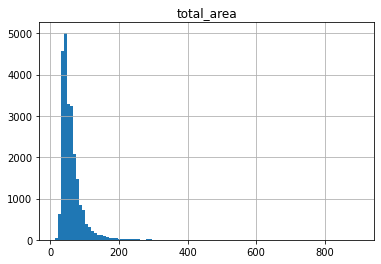

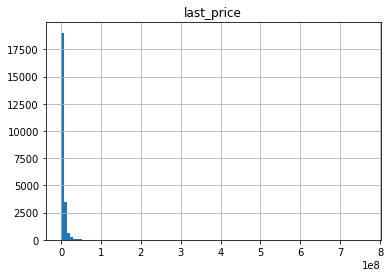

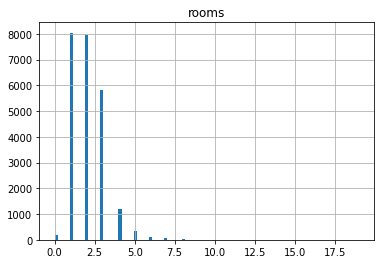

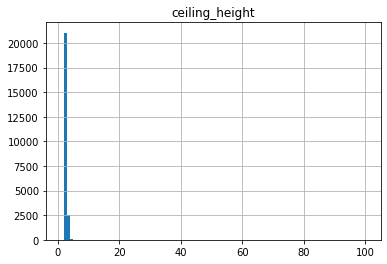

In [40]:
# напишем функцию для автоматизации построения гистограмм
features = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for col in features:
    data_estate.hist(col, bins=100);
    plt.show()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

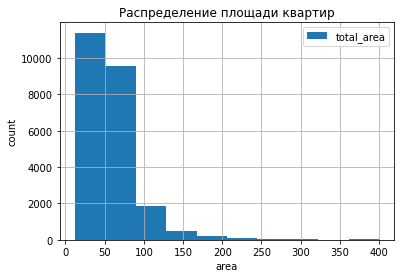

In [41]:
display(data_estate['total_area'].describe())
# с помощью метода describe() выясним минимамальные и максимальные площади квартир. 
# средняя площадь квартир 60 кв.м., минимальная 12 кв.м., максимальная 900 кв.м.
# глядя на 3-й квартиль, равный 69,9 кв. м, можно сделать вывод о том, что квартира с площадью в 900 кв.м. - выброс.
# посмотрев на предыдущую гистограмму, видим, что диапазон целесообразно указать от 12 до 400
# среднее больше медианы на 8 метров. Это свидетельствует о том, что есть хвост больших значений.
# Или о том, что есть несколько очень больших по площади квартир, которые оказывают влияние на среднее значение.
ax = data_estate.plot(kind = 'hist', y = 'total_area', range=(12, 400), grid=True);
ax.set_xlabel('area');
ax.set_ylabel('count');
plt.title('Распределение площади квартир');

Глядя на гистограмму, можно сделать вывод, что большинство квартир (около 11000) имеют маленькую площадь - от 12 до 50 кв. м. На втором месте по распространенности, квартиры площадью от 50 до 90 кв.м. (их насчитывается чуть более 9000). Чуть менее 2000 квартир с площадью от 90 до 125 кв. м. И незначительное количество квартир больших площадей.

Для того, чтобы убрать редкие и выбивающиеся значения воспользуемся методом boxplot(). Построим ящики с усами, увидим выбросы и далее методом query сделаем срезы данных.

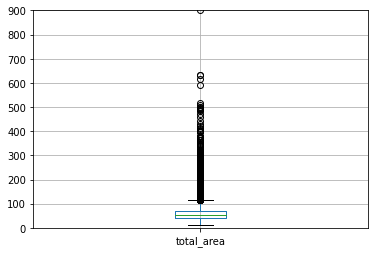

In [42]:
data_estate.boxplot('total_area')
plt.ylim(0, 900);
# по оси у указали минимальное и максимальное значение из метода describe().

Нижний «ус» упирается в минимальные 12 метров. Верхний заканчивается около 110 кв. метров - это 1.5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов у нас очень много.
И всё же значения, которые отсёк верхний «ус» — редкие. Видно, что медиана не стремится к длинному хвосту высоких значений.

Настало время отбросить лишнее. Остановимся на квартирах до 150 метрах, так мы не потеряем много данных.

Срез данных сделаем для всех столбцов после того, как постоим и изучим все ящики с усами.

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

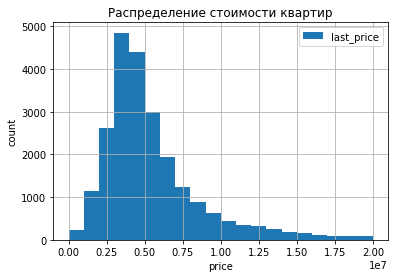

In [43]:
display(data_estate['last_price'].describe())
# с помощью метода describe() выясним минимамальные и максимальные цены на квартиры. 
# средняя цена квартир 6,5 млн., минимальная 12190 руб., максимальная 763 млн.
# глядя на 3-й квартиль, равный 6,8 млн, можно сделать вывод о том, что квартира с ценой 763 млн. - выброс.
ax = data_estate.plot(kind = 'hist', y = 'last_price', bins=20, range=(0, 20000000), grid=True);
ax.set_xlabel('price');
ax.set_ylabel('count');
plt.title('Распределение стоимости квартир');

Глядя на гистограмму, можно сделать вывод, что большинство квартир (около 9000) стоят в диапазоне от 3 до 5 млн. руб. На втором месте по распространенности, квартиры ценой от 2 до 3 и от 5 до 7 млн. руб. (их насчитывается около 7500). Чуть больше 1000 квартир с ценой от 1 до 2 млн, около 200 квартир с ценой менее млн. При возрастании цены от 7 млн и выше, наблюдается снижение количесва объявлений.

(0.0, 20000000.0)

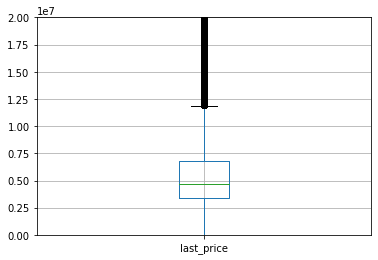

In [44]:
data_estate.boxplot('last_price')
plt.ylim(0, 763000000)
# по оси у указали минимальное и максимальное значение из метода describe().
# всё сливается, попробуем указать максимум в 20 млн.
plt.ylim(0, 20000000)

Нижний «ус» упирается в минимальные 12190 руб. Верхний заканчивается около 12 млн. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом. Более высокие значения сливаются в единую жирную линию: таких выбросов у нас очень много. И всё же значения, которые отсёк верхний «ус» — редкие. Видно, что медиана не стремится к длинному хвосту высоких значений.

Настало время отбросить лишнее. Остановимся на квартирах стоимостью до 15 млн, так мы не потеряем много данных.

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

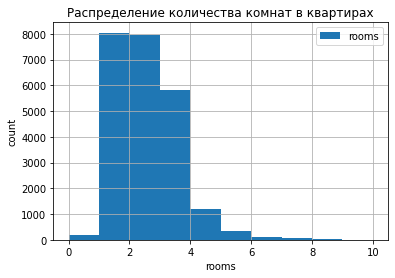

In [45]:
display(data_estate['rooms'].describe())
# с помощью метода describe() выясним минимамальные и максимальные количество комнат в квартире. 
# среднестатистическая квартира - двушка, минимальное количество комнат 0 (студия), максимальное 19.
# глядя на 3-й квартиль, равный 3-м комнатам, можно сделать вывод о том, что квартира с 19 комнатами - выброс.
# посмотрев на предыдущую гистограмму, видим, что диапазон целесообразно указать от 0 до 10
ax = data_estate.plot(kind = 'hist', y = 'rooms', range=(0, 10), grid=True);
ax.set_xlabel('rooms');
ax.set_ylabel('count');
plt.title('Распределение количества комнат в квартирах');

Глядя на гистограмму, можно сделать вывод, что большинство квартир (чуть более 8000) однокомнатные. 8000 квартир двушки. Чуть менее 6000 - трёхкомнатные. Далее мы видим чёткую тенденцию: чем больше комнат, тем меньше таких предложений на рынке.

(0.0, 10.0)

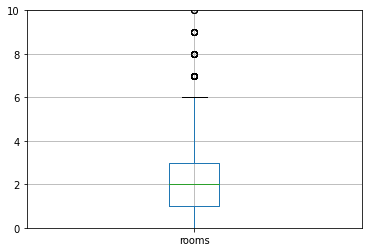

In [46]:
data_estate.boxplot('rooms')
plt.ylim(0, 10)
# по оси у указали минимальное и максимальное значение из метода describe().

Нижний «ус» упирается в минимальные 0 комнат. Верхний заканчивается около 6 комнат. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом. Более высокие значения рисуются отдельными точками и в данном случае не сливаются в единую линию: таких выбросов у нас мало.

Настало время отбросить лишнее. Остановимся на квартирах, в которых менее 6 комнат.

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

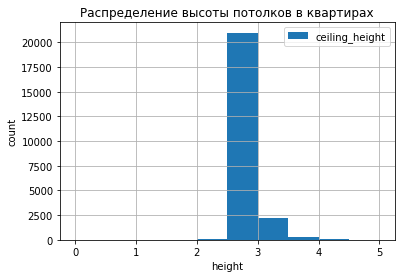

In [47]:
display(data_estate['ceiling_height'].describe())
# с помощью метода describe() выясним минимамальную и максимальную высоту потолков. 
# средняя высота потолка 2,72 м. минимальная 1 м., максимальная 100 м.
# глядя на 1, 2 и 3-й квартиль, можно сделать вывод о том, что высота потолков в 1 и 100 м. - выбросы.
ax = data_estate.plot(kind = 'hist', y = 'ceiling_height', bins=10, range=(0, 5), grid=True);
ax.set_xlabel('height');
ax.set_ylabel('count');
plt.title('Распределение высоты потолков в квартирах');

Глядя на гистограмму, можно сделать вывод, что подавляющее большинство квартир (около 21000) имеет высоту потолков от 2,5 до 3-х метов. Чуть меньше чем 2500 квартир имеют высоту потолков превышающую 3 метра (от 3-х до 3,5 метов). Ничтожно малое количество квартир имеют высоту потолков менее 2,5 метров и более 3,5 метров.

(1.0, 5.0)

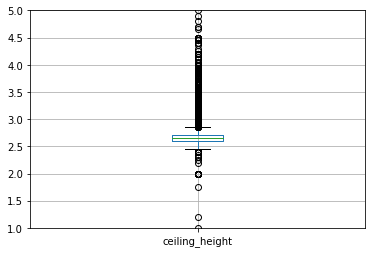

In [48]:
data_estate.boxplot('ceiling_height')
plt.ylim(1, 100)
# по оси у указали минимальное и максимальное значение из метода describe().
# всё слилось, отбросим выброс в 100 метров
plt.ylim(1, 5)

Нижний «ус» упирается в 2,5 метра. Верхний заканчивается около 3-х метров. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом. Более высокие значения рисуются отдельными точками и сливаются в жирую линию: таких выбросов (до 4-х метров) у нас много.

Настало время отбросить лишнее. Остановимся на квартирах, в которых потолки от 2,5 до 4 метров.

#### Изучим время продажи квартир.

Постром гистограмму. Посчитаем среднее и медиану. Опишим, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго.
Уберём редкие и выбивающиеся значения. Опишим, какие особенности обнаружили.

count    23699.000000
mean       170.664374
std        206.420723
min          1.000000
25%         45.000000
50%         92.000000
75%        200.000000
max       1580.000000
Name: days_exposition, dtype: float64

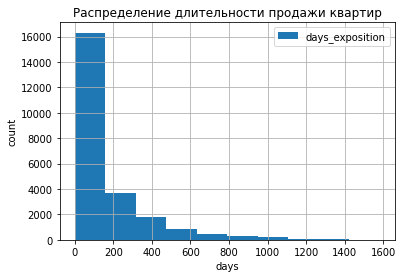

In [49]:
display(data_estate['days_exposition'].describe())
# с помощью метода describe() выясним минимамальное и максимальное время продажи. 
# среднее время продажи 170 дней, самая скоростная 1 день, одна из квартир продавалась более 4-х лет.
# глядя на 3-й квартиль, равный 200 дням, можно сделать вывод о том, что 4 года - это выброс.
# среднее больше медианы на 78 дней (почти в 2 раза). Это свидетельствует о том, что есть хвост больших значений.
# Или о том, что есть несколько очень долгих по продаже квартир, которые оказывают влияние на среднее значение.
ax = data_estate.plot(kind = 'hist', y = 'days_exposition', bins=10, range=(0, 1580), grid=True);
ax.set_xlabel('days');
ax.set_ylabel('count');
plt.title('Распределение длительности продажи квартир');

Глядя на гистограмму, можно сделать вывод, что подавляющее большинство квартир (больше 16000) продаются в период от 1 до 160 дней. Почти 4000 квартир продаются в течение 160 - 300 дней, менее 2000 квартир в течение 300 - 450 дней. Дальше видна тенденция, что всё меньшее количество кватир продаётся долго.

Для того, чтобы убрать редкие и выбивающиеся значения воспользуемся методом boxplot(). Построим ящики с усами, увидим выбросы и далее методом query сделаем срезы данных.

(1.0, 1580.0)

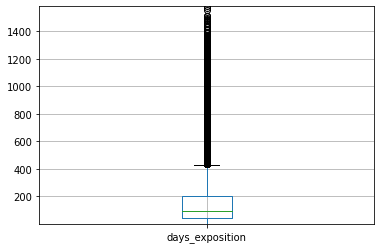

In [50]:
data_estate.boxplot('days_exposition')
plt.ylim(1, 1580)
# по оси у указали минимальное и максимальное значение из метода describe().

Нижний «ус» упирается в минимальный срок продажи 1 день. Верхний заканчивается около 420 дней. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов у нас очень много. И всё же значения, которые отсёк верхний «ус» — редкие. Видно, что медиана не стремится к длинному хвосту высоких значений.

Остановимся на сроках продажи до 420 дней.


Медианное значение скорости продажи квартиры составляет 92 дня. Соответственно, если квартира продаётся быстрее этого срока, то можно считать это быстрой продажей. Если продажа осуществляется быстрее, чем за 45 дней (первый квартиль), то это очень быстро. От 92 дней до 200 (третий квартиль) - долгая продажа, а более 200 дней необычно долгая продажа.

Настало время сделать срез данных для всех столбцов, для которых мы строили гистограммы.

In [51]:
data_estate_sample = data_estate.query\
('total_area <= 150 and last_price <= 15000000 \
and rooms <= 6 and 2.5 <= ceiling_height <= 3.5 and days_exposition <= 420')

In [52]:
display(data_estate_sample.head(10))
data_estate_sample.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday,month,year,floor_category,living_area_to_total,kitchen_area_to_total
0,20,13000000,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,False,...,2.0,755.0,114,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04T00:00:00,1,2.65,11,18.60,1,False,...,0.0,NaN,81,82920,1,12,2018,первый,0.460396,0.272277
4,2,10000000,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,...,1.0,48.0,121,100000,1,6,2018,другой,0.320000,0.410000
5,10,2890000,30.40,2018-09-10T00:00:00,1,2.65,12,14.40,5,False,...,NaN,NaN,55,95065,0,9,2018,другой,0.473684,0.299342
6,6,3700000,37.30,2017-11-02T00:00:00,1,2.65,26,10.60,6,False,...,0.0,NaN,155,99195,3,11,2017,другой,0.284182,0.386059
7,5,7915000,71.60,2019-04-18T00:00:00,2,2.65,24,30.50,22,False,...,0.0,NaN,91,110544,3,4,2019,другой,0.425978,0.263966
8,20,2900000,33.16,2018-05-23T00:00:00,1,2.65,27,15.43,26,False,...,NaN,NaN,189,87454,2,5,2018,другой,0.465320,0.265682
9,18,5400000,61.00,2017-02-26T00:00:00,3,2.50,9,43.60,7,False,...,0.0,NaN,289,88524,6,2,2017,другой,0.714754,0.106557
10,5,5050000,39.60,2017-11-16T00:00:00,1,2.67,12,20.30,3,False,...,2.0,553.0,137,127525,3,11,2017,другой,0.512626,0.214646
11,9,3300000,44.00,2018-08-27T00:00:00,2,2.65,5,31.00,4,False,...,0.0,NaN,7,75000,0,8,2018,другой,0.704545,0.136364


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19970 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_images           19970 non-null  int64  
 1   last_price             19970 non-null  int64  
 2   total_area             19970 non-null  float64
 3   first_day_exposition   19970 non-null  object 
 4   rooms                  19970 non-null  int64  
 5   ceiling_height         19970 non-null  float64
 6   floors_total           19970 non-null  int64  
 7   living_area            19970 non-null  float64
 8   floor                  19970 non-null  int64  
 9   is_apartment           19970 non-null  object 
 10  studio                 19970 non-null  bool   
 11  open_plan              19970 non-null  bool   
 12  kitchen_area           19970 non-null  float64
 13  balcony                19970 non-null  int64  
 14  locality_name          19970 non-null  object 
 15  ai

#### Какие факторы больше всего влияют на стоимость квартиры

Изучим, зависит ли цена квадратного метра от числа комнат, этажа (первого или последнего), удалённости от центра. Также изучим зависимость от даты размещения: дня недели, месяца и года. 

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные найдём по имени в столбце 'locality_name'.

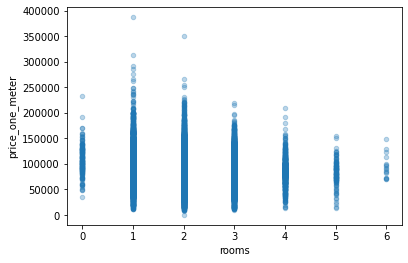

In [53]:
# для ответа на вопрос зависимости цены от количества комнат в квартире постоим график
data_estate_sample.plot(x='rooms', y='price_one_meter', kind='scatter', alpha=0.3);

In [54]:
# посчитаем коэффициент корелляции
display(data_estate_sample['rooms'].corr(data_estate_sample['price_one_meter']))

-0.17316084656533026

Коэффициент корреляции Пирсона -0,17, что свидетельствует о том, что уменьшение одной величины связано с увеличением другой.
Судя по коэффециенту корреляции взаимосвязь незначительная. Тем не менее, глядя на глафик, мы видим определенную зависимость - чем меньше комнат, тем выше цена. Шестикомнатными квартирами можно пренебречь, так как мы помним, что их ничтожно мало.

In [55]:
# диаграмму рассеяния мы здесь построить не можем, так как значения столбца не числовые
# поэтому создадим сводную таблицу зависимости цены от этажа
floor_pivod = data_estate_sample.pivot_table(index=['floor_category'], values='price_one_meter', aggfunc = 'mean')
# отсортируем сводную таблицу по цене
floor_pivod.sort_values(by = 'price_one_meter')

,price_one_meter
floor_category,
первый,79738.189277
последний,84629.833515
другой,97529.448554


Подтвердили очевидное: квартиры на первых и последних этажах всегда стоят дешевле, чем на всех остальных. Интересная особенность на первом этаже самая дешёвая цена.

Для того, чтобы выяснить зависимость между ценой за 1 кв.м. и удаленностью от центра, посторим диаграмму рассеяния.

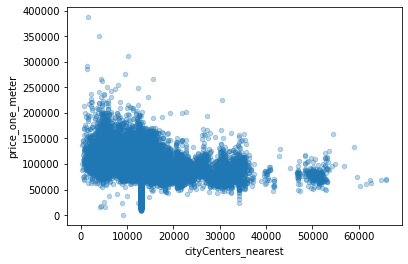

In [56]:
data_estate_sample.plot(x='cityCenters_nearest', y='price_one_meter', kind='scatter', alpha=0.3);

In [57]:
# посчитаем коэффициент корелляции
display(data_estate_sample['cityCenters_nearest'].corr(data_estate_sample['price_one_meter']))

-0.22031090536420547

Коэффициент корреляции Пирсона -0,22, что свидетельствует о том, что чем ближе к центру, тем выше цена за 1 кв.м.
Судя по коэффециенту корреляции взаимосвязь не слишком сильная. Это объясняется тем, что на стоимость квартир оказывает влияние множество факторов: старый или новый жилой фонд, наличие ремонта, этаж, площадь квартиры и т.д.

Изучим зависимость цены от даты размещения: дня недели, месяца и года.
Создадим переменную data_stat_multi, в которой сведем день недели, месяц и год. Распечатаем матрицу корреляции между этими величинами. Построим диаграмму рассеяния попарно для всех величин методом scatter_matrix.

,price_one_meter,month,weekday,year
price_one_meter,1.000000,-0.002539,-0.012829,0.092634
month,-0.002539,1.000000,0.007320,-0.317226
weekday,-0.012829,0.007320,1.000000,-0.014080
year,0.092634,-0.317226,-0.014080,1.000000


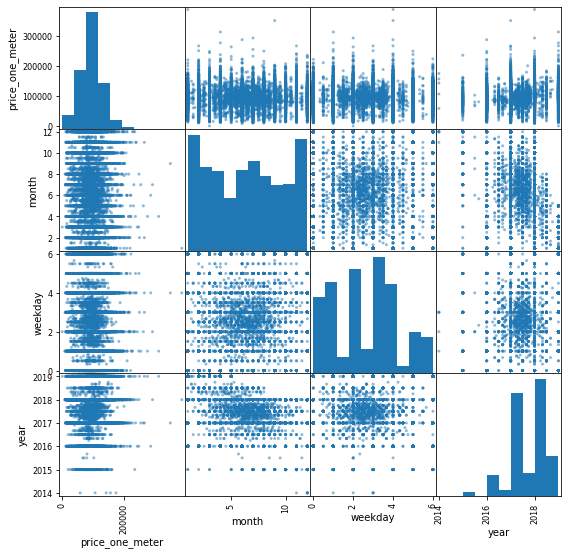

In [58]:
data_stat_multi = data_estate_sample.pivot_table(index='price_one_meter', 
                                                 values=['weekday', 'month', 'year'], aggfunc='mean').reset_index()
display(data_stat_multi.corr())
pd.plotting.scatter_matrix(data_stat_multi, figsize=(9, 9));

Изучим диаграмму рассеяния для всех величин.
- в верхней левой ячейке связь цены с ценой. Это не диаграмма рассеяния, а обычная гистограмма. Видно, что самай высокая цена была в 2017 и 2018 году.
- в ячейке ниже: связь цены и месяца. Можно выделить овальную зону по центу. Выходит, что больше всего предложений в середине года с весны по осень и в этот период цены на недвижимость выше.
- в ячейке ниже: связь цены и дня недели. Можно выделить овальную зону по центу. Выходит, что больше всего предложений в будние дни и в этот период цены на недвижимость выше.
- год и цена: самое большое количество публикаций объявлений выпало на период между 2017 и 2018 годом - многие хотели продать свою недвижимость. Также видно, что год от года цена на недвижимость постепенно увеличивается.
- гистограмма месяца (month) сообщает, что больше всего объявлений публикуется с весны по осень.
- гистограмма дня недели (weekday) сообщает, что больше всего объявлений публикуется в будние дни (0 - 4).
- гистограмма года (year) имеет два пика: 2017 и 2018 год.
- по другую сторону диагонали зеркально расположились те же данные, только оси поменялись местами. 

Коэффициенты корреляции по этим параметрам незначительные, что свидетельствует от очень слабой связи между данными параметрами либо вообще о полном её отсутствии. Самая большая корреляция между ценой и годом публикации 0,09, это подтверждает наш вывод о том, что цены на недвижимость медленно, но верно растут.

In [59]:
# Выберем 10 населённых пунктов с наибольшим числом объявлений. 
top_10_locality = (data_estate_sample['locality_name']
                   .value_counts()
                   .head(10)
                   .reset_index()
                  )
top_10_locality.columns=['locality_name', 'count']
top_10_locality

,locality_name,count
0,Санкт-Петербург,12869
1,посёлок Мурино,477
2,посёлок Шушары,404
3,Всеволожск,350
4,Колпино,314
5,Пушкин,313
6,посёлок Парголово,298
7,Гатчина,271
8,деревня Кудрово,263
9,Выборг,207


In [60]:
# Посчитаем среднюю цену квадратного метра по населённым пунктам. 
price_stat = data_estate_sample.pivot_table(index='locality_name', 
                                            values='price_one_meter', aggfunc='mean').reset_index()
price_stat.columns=['locality_name', 'mean']
price_stat

,locality_name,mean
0,Бокситогорск,17456.800000
1,Волосово,40683.214286
2,Волхов,34942.213592
3,Всеволожск,67310.000000
4,Выборг,58201.357488
...,...,...
352,село Путилово,41237.000000
353,село Рождествено,37732.666667
354,село Русско-Высоцкое,56253.000000
355,село Старая Ладога,34696.500000


In [61]:
# методом merge () склеим таблицы
top_10_locality_stat = top_10_locality.merge(price_stat, on='locality_name', how='left')
top_10_locality_stat.sort_values(by='mean')

,locality_name,count,mean
9,Выборг,207,58201.357488
3,Всеволожск,350,67310.000000
7,Гатчина,271,69075.682657
4,Колпино,314,75303.219745
2,посёлок Шушары,404,78781.356436
1,посёлок Мурино,477,85973.394130
6,посёлок Парголово,298,89944.946309
8,деревня Кудрово,263,92694.357414
5,Пушкин,313,101068.575080
0,Санкт-Петербург,12869,107274.504779


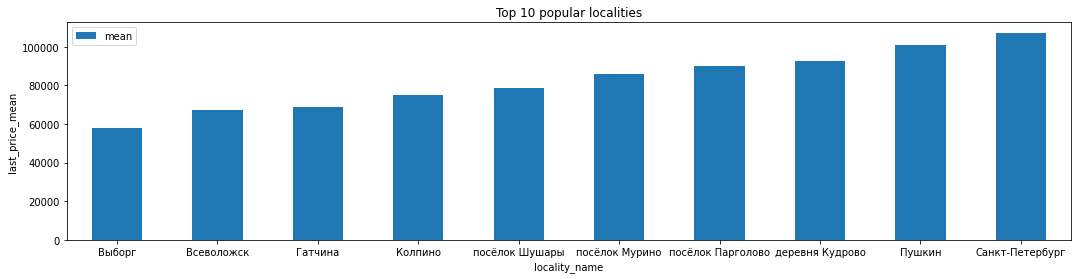

In [62]:
# построим столбчатый график, 
# который наглядно покажет цены на недвижимость в населенных пунктах с максимальным количеством объявлений.
top_10_locality_stat.sort_values(by='mean').plot(x='locality_name', y='mean', kind='bar', figsize=(18, 4));
plt.xticks(rotation=0);
plt.ylabel('last_price_mean');
plt.title('Top 10 popular localities');

Глядя на график, можем сделать вывод, что самая низкая цена за 1 кв. м в Выборге - менее 60 тыс. рублей. В районе 70 тыс. руб. стоит 1 кв. м. жилья в Всеволожске и Гатчине. Самая дорогая недвижимость, разуммется в Питере - около 110 тыс. руб. за 1 кв.м., далее идёт Пушкин с ценником в 100 тыс. и деревня Кудрово со средней ценой в 90 тыс. руб. за 1 кв. метр.

#### Какая область является центром Санкт-Петербурга

Выделим квартиры только в Санкт-Петербурге ('locality_name'). Создадим столбец с расстоянием до центра в километрах с целыми значениями. После этого посчитаем среднюю цену для каждого километра. Построим график, который покажет как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и есть центральная зона. 

In [63]:
# создадим переменную только с квартирами в Спб
spb_estate = data_estate_sample.query('locality_name == "Санкт-Петербург"')

In [64]:
# создадим столбец с расстоянием до центра в км, переведем в целочисленные значения
spb_estate['distance_to_center_km'] = spb_estate['cityCenters_nearest'] / 1000
spb_estate['distance_to_center_km'] = spb_estate['distance_to_center_km'].round()

<ipython-input-64-bfde85b78920>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_estate['distance_to_center_km'] = spb_estate['cityCenters_nearest'] / 1000
<ipython-input-64-bfde85b78920>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_estate['distance_to_center_km'] = spb_estate['distance_to_center_km'].round()


In [65]:
# переведем данные нового столбца в целочисленные значения
spb_estate['distance_to_center_km'] = spb_estate['distance_to_center_km'].astype(int)
spb_estate.head(10)

<ipython-input-65-53c2631af50c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_estate['distance_to_center_km'] = spb_estate['distance_to_center_km'].astype(int)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_one_meter,weekday,month,year,floor_category,living_area_to_total,kitchen_area_to_total,distance_to_center_km
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,755.0,114,120370,3,3,2019,другой,0.472222,0.231481,16
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,48.0,121,100000,1,6,2018,другой,0.320000,0.410000,8
7,5,7915000,71.6,2019-04-18T00:00:00,2,2.65,24,30.5,22,False,...,NaN,91,110544,3,4,2019,другой,0.425978,0.263966,12
9,18,5400000,61.0,2017-02-26T00:00:00,3,2.50,9,43.6,7,False,...,NaN,289,88524,6,2,2017,другой,0.714754,0.106557,15
10,5,5050000,39.6,2017-11-16T00:00:00,1,2.67,12,20.3,3,False,...,553.0,137,127525,3,11,2017,другой,0.512626,0.214646,14
15,16,4650000,39.0,2017-11-18T00:00:00,1,2.65,14,20.5,5,False,...,296.0,19,119230,5,11,2017,другой,0.525641,0.194872,14
16,11,6700000,82.0,2017-11-23T00:00:00,3,3.05,5,55.6,1,False,...,NaN,397,81707,3,11,2017,первый,0.678049,0.109756,11
18,8,3250000,31.0,2017-01-27T00:00:00,1,2.50,5,19.4,2,False,...,NaN,168,104838,4,1,2017,другой,0.625806,0.180645,11
19,16,14200000,121.0,2019-01-09T00:00:00,3,2.75,16,76.0,8,False,...,NaN,97,117355,2,1,2019,другой,0.628099,0.099174,13
21,13,3200000,31.6,2018-03-14T00:00:00,1,2.65,5,16.9,2,False,...,NaN,310,101265,2,3,2018,другой,0.534810,0.180380,10


In [66]:
# Посчитаем среднюю цену для каждого километра
spb_estate.groupby('distance_to_center_km')['price_one_meter'].mean()

distance_to_center_km
0     110557.500000
1     122436.423913
2     123401.533333
3     112391.372197
4     119074.140143
5     123063.470803
6     125303.945409
7     119644.260563
8     117639.177677
9     109744.969574
10    109842.546774
11    105972.372898
12    107487.821477
13    108116.866667
14    104210.681109
15    103352.520567
16     99955.287576
17     96414.615187
18     96594.938596
19     99350.559441
20    103483.977273
21     94748.547170
22     91862.066298
23     91647.080000
24     84566.200000
25     91944.880000
26     89214.549020
27    132115.000000
28     81161.571429
29     69714.666667
Name: price_one_meter, dtype: float64

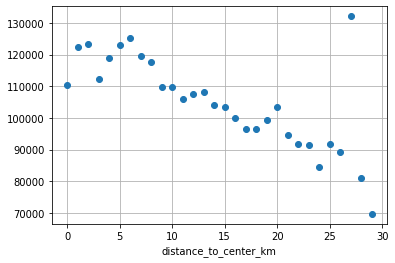

In [67]:
# Построим график, который покажет как цена зависит от удалённости от центра. 
# Определим границу, где график сильно меняется — это и есть центральная зона.
spb_estate.groupby('distance_to_center_km')['price_one_meter'].mean().plot(style='o', grid=True);

Судя по графику, можно сделать вывод, что центром Питера является точка с радиусом 6 км. Так как потом мы видим резкое снижение.

#### Выделим сегмент квартир в центре. 

Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделаем выводы. Обратим внимание, отличаются ли они от общих выводов по всему городу.

Для выполнения этой задачи построим гистограммы по каждому параметру. Ящики с усами на этом этапе строить уже не будем, так как мы очистили данные от выбросов. Затем, график по каждому параметру для квартир в центре (площадь, число комнат и т.п.) сравним с графиком по всей Лен. обсласти. Для этого разместим 2 графика вместе.

In [68]:
# для того, чтобы выделить сегмент квартир в центре Санкт-Петербурга сделаем срез с посощью метода query()
spb_estate_center = spb_estate.query('distance_to_center_km <= 6')

count    1860.000000
mean       70.843909
std        25.928092
min        12.000000
25%        50.375000
50%        68.205000
75%        87.000000
max       150.000000
Name: total_area, dtype: float64

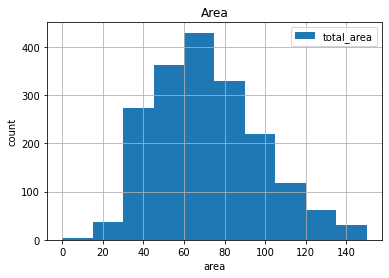

In [69]:
display(spb_estate_center['total_area'].describe())
# с помощью метода describe() выясним минимамальные и максимальные площади квартир. 
# средняя площадь квартир 70 кв.м., минимальная 12 кв.м., максимальная 150 кв.м.
ax = spb_estate_center.plot(kind = 'hist', y = 'total_area', title = 'Area', bins=10, range=(0, 150), grid=True);
ax.set_xlabel('area');
ax.set_ylabel('count');

Глядя на гистограмму, можно сделать вывод, что большинство квартир (чуть более 400) имеют площадь - от 60 до 75 кв. м. На втором месте по распространенности, квартиры площадью от 45 до 60 кв.м. (их насчитывается чуть больше 350). Чуть менее 350 квартир с площадью от 75 до 90 кв. м. И незначительное количество квартир больших площадей.

Для наглядности сравним графики площадей квартир по всей Ленинградской области и по центру Питера.

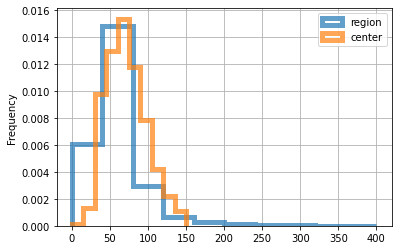

In [70]:
ax = data_estate.plot(kind='hist', y='total_area', histtype='step', range=(0, 400), bins=10, linewidth=5, 
                      alpha=0.7, label='region', density=True);
spb_estate_center.plot(kind='hist', y='total_area', histtype='step', range=(0, 150), bins=10, linewidth=5, 
                       alpha=0.7, label='center', ax=ax, grid=True, legend=True, density=True);

Сравнив 2 гистограммы, можно сделать вывод, что в центре Санкт-Петербурга в целом площадь квартир незначительно больше. По области мы видим чёткий скачок от 40 до 80 метров, а в центре Питера это распределение более пологое и большинство квартир имеют площадь от 60 до 90 метров.

count    1.860000e+03
mean     8.223692e+06
std      2.845397e+06
min      1.600000e+06
25%      6.100000e+06
50%      7.875000e+06
75%      1.000000e+07
max      1.500000e+07
Name: last_price, dtype: float64

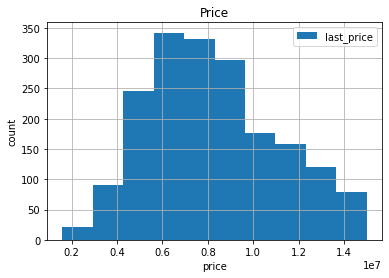

In [71]:
display(spb_estate_center['last_price'].describe())
# с помощью метода describe() выясним минимамальную и максимальную цену на квартиры. 
# средняя цена квартир 8,2 млн., минимальная 1,6 млн., максимальная 15 млн.
ax = spb_estate_center.plot(kind = 'hist', y = 'last_price', title = 'Price', bins=10, range=(1600000, 15000000), grid=True);
ax.set_xlabel('price');
ax.set_ylabel('count');

Глядя на гистограмму, можно сделать вывод, что большинство квартир (чуть более 750) стоят от 6 млн. до 9 млн. На втором месте по распространенности, квартиры стоимостью от 4,5 млн до 6 млн. (их настчитывается около 310). Чуть менее 250 квартир стоят от 9 до 10,5 млн. Далее мы видим тенденцию, что шем выше цена, тем меньше таких предложений на рынке

Для наглядности сравним графики стоимости квартир по всей Ленинградской области и по центру Питера.

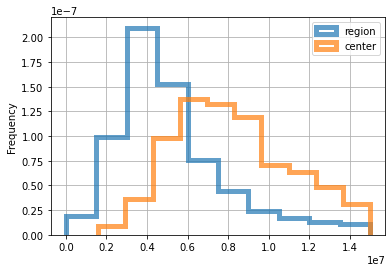

In [72]:
ax = data_estate.plot(kind='hist', y='last_price', histtype='step', range=(0, 15000000), bins=10, linewidth=5, 
                      alpha=0.7, label='region', density=True);
spb_estate_center.plot(kind='hist', y='last_price', histtype='step', range=(1600000, 15000000), bins=10, 
                       linewidth=5, alpha=0.7, label='center', ax=ax, grid=True, legend=True, density=True);

Сравнив 2 гистограммы, можно сделать крайне логичный вывод, что в центре Санкт-Петербурга квартиры стоят дороже, чем в Лен. области. По области мы видим, что большинство квартир стоят от 3-х до 6-ти миллионов, а в центре Питера  от 6-ти до 9-ти млн.

count    1860.000000
mean        2.460753
std         1.078953
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64

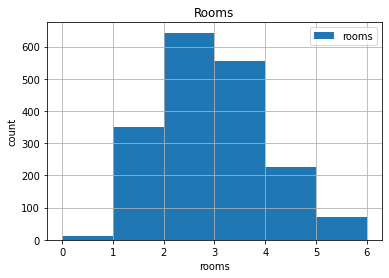

In [73]:
display(spb_estate_center['rooms'].describe())
# с помощью метода describe() выясним минимамальное и максимальнок количество комнат в квартирах. 
# среднее количество комнат 2,46, минимальное 0, максимальная 6.
ax = spb_estate_center.plot(kind = 'hist', y = 'rooms', title = 'Rooms', bins=6, range=(0, 6), grid=True);
ax.set_xlabel('rooms');
ax.set_ylabel('count');

Глядя на гистограмму, можно сделать вывод, что большинство квартир (около 650) это двухкомнатные. На втором месте по распространенности, трёхкомнатные (их настчитывается около 550). На третьем месте однокомнатные - их около 250. Далее мы видим тенденцию, что чем больше комнат, тем меньше таких предложений на рынке.

Для наглядности сравним графики количества комнат в квартирах по всей Ленинградской области и по центру Питера.

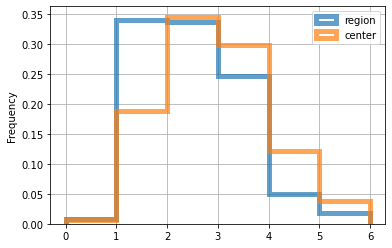

In [74]:
ax = data_estate.plot(kind='hist', y='rooms', histtype='step', range=(0, 6), bins=6, linewidth=5, alpha=0.7, 
                      label='region', density=True);
spb_estate_center.plot(kind='hist', y='rooms', histtype='step', range=(0, 6), bins=6, linewidth=5, alpha=0.7, 
                       label='center', ax=ax, grid=True, legend=True, density=True);

Сравнив 2 гистограммы, можно сделать вывод, что в центре Санкт-Петербурга жилищный фонд в основном представлен 2-хкомнатными и 3-хкомнатными квартирами. Тогда как в области первенство держат однокомнатные и 2-хкомнатные квартиры.

count    1860.000000
mean        2.865753
std         0.266483
min         2.500000
25%         2.650000
50%         2.750000
75%         3.022500
max         3.500000
Name: ceiling_height, dtype: float64

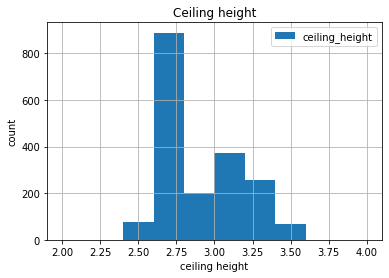

In [75]:
display(spb_estate_center['ceiling_height'].describe())
# с помощью метода describe() выясним минимамальную и максимальную высоту потолков в квартирах. 
# средняя высота потолков 2,86, минимальное 2,5, максимальная 3,5.
ax = spb_estate_center.plot(kind = 'hist', y = 'ceiling_height', title = 'Ceiling height', bins=10, range=(2, 4), 
                            grid=True);
ax.set_xlabel('ceiling height');
ax.set_ylabel('count');

Глядя на гистограмму, можно сделать вывод, что большинство квартир (более 900) имеют стандартную высоту потолков от 2,5 до 2,8 метров. На втором месте по распространенности, квартиры с высокими потолками от 3-х до 3,35 метров (их насчитывается около 600). На третьем месте квартиры с потолками от 2,8 до 3-х метров - их 200. Квартир с потолками ниже 2,6 метра и выше 3,4 метра очень мало - по 50.

Для наглядности сравним графики высоты потолков по всей Ленинградской области и по центру Питера.

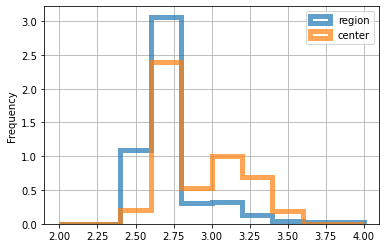

In [76]:
ax = data_estate.plot(kind='hist', y='ceiling_height', histtype='step', range=(2, 4), bins=10, linewidth=5, 
                      alpha=0.7, label='region', density=True);
spb_estate_center.plot(kind='hist', y='ceiling_height', histtype='step', range=(2, 4), bins=10, linewidth=5, 
                       alpha=0.7, label='center', ax=ax, grid=True, legend=True, density=True);

Сравнив 2 гистограммы видим, что в центре Петербурга, также как и в области самой распространенной высотой потолков является 2,5-2,8 метра. Однако, в пропорциональном отношении видно, что в Петергурге более распространены квартиры с высокими потолками, нежели в области. Это объясняется ем, что в центре продают дома старой застройки, а в то время были другие стандарты. Так, в сталинках, а уж тем более, в домах, постороенных в Российской Империи, высота потолков существенно выше, чем в современных зданиях.

Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделаем выводы. Обратим внимание, отличаются ли они от общих выводов по всему городу.

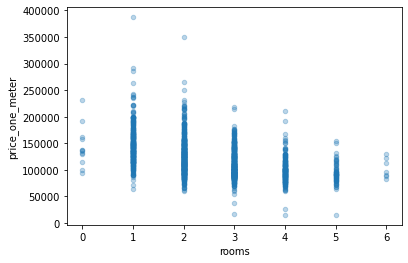

In [77]:
# для ответа на вопрос зависимости цены от количества комнат в квартире постоим график
spb_estate_center.plot(x='rooms', y='price_one_meter', kind='scatter', alpha=0.3);

In [78]:
# посчитаем коэффициент корелляции
display(spb_estate_center['rooms'].corr(spb_estate_center['price_one_meter']))

-0.46338723098833984

Коэффициент корреляции Пирсона -0,46, что свидетельствует о том, что уменьшение одной величины связано с увеличением другой. Судя по коэффециенту корреляции взаимосвязь имеется. Более того, глядя на график, мы видим что чем меньше комнат, тем выше цена. Студиями можно пренебречь, так как мы помним, что их ничтожно мало.

Вспомним, что во всей Лен. области прослеживается такая же зависимость, однако корреляция этих величин заметно меньше и составляет -0,17.

In [79]:
# диаграмму рассеяния мы здесь построить не можем, так как значения столбца не числовые
# поэтому создадим сводную таблицу зависимости цены от этажа
floor_spb_pivod = spb_estate_center.pivot_table(index=['floor_category'], values='price_one_meter', 
                                                aggfunc = 'mean')
# отсортируем сводную таблицу по цене
floor_spb_pivod.sort_values(by = 'price_one_meter')

,price_one_meter
floor_category,
первый,112985.089552
последний,117396.915152
другой,124103.517433


Подтвердили очевидное: квартиры на первых и последних этажах всегда стоят дешевле, чем на всех остальных. Причем самая низкая цена на недвижимость на 1-м этаже.
Вспомним, что для Лен. области были сделаны точно такие же выводы. Данная тенденция применима ко всей недвижимости, вне зависимости от места её продажи.

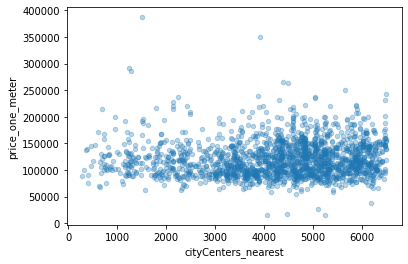

In [80]:
# для того, чтобы выяснить зависимость цены за 1 кв.м. и удаленности от центра построим диаграмму рассеяния.
spb_estate_center.plot(x='cityCenters_nearest', y='price_one_meter', kind='scatter', alpha=0.3);

In [81]:
# посчитаем коэффициент корелляции
display(spb_estate_center['cityCenters_nearest'].corr(spb_estate_center['price_one_meter']))

0.06233647860430598

Коэффициент корреляции Пирсона 0,06, что свидетельствует о том, что взаимосвязи нет. Во-первых, это объясняется тем, что вся рассматриваемая нами область, это и есть центр города. Более того, глядя на график, мы видим, что чем дальше от нулевой отметки центра, тем больше предложений о продаже и разброс по ценам возрастает как в большую, так и в меньшую сторону.

Напомним, что для Лен. области ситуация обратная. Там коэффициент корреляции был равен -0,22, следовательно прослеживалась взаимосвязь, что чем ближе к центру, тем дороже квартира. Однако, стоит отметить, что эта взаимосвязь тоже не является достаточно сильной. Это объясняется тем, что на стоимость квартир оказывает влияние множество факторов: старый или новый жилой фонд, наличие ремонта, этаж, площадь квартиры и т.д.

                 price_one_meter     month   weekday      year
price_one_meter         1.000000 -0.027504  0.046522  0.141407
month                  -0.027504  1.000000  0.044482 -0.288472
weekday                 0.046522  0.044482  1.000000 -0.016151
year                    0.141407 -0.288472 -0.016151  1.000000


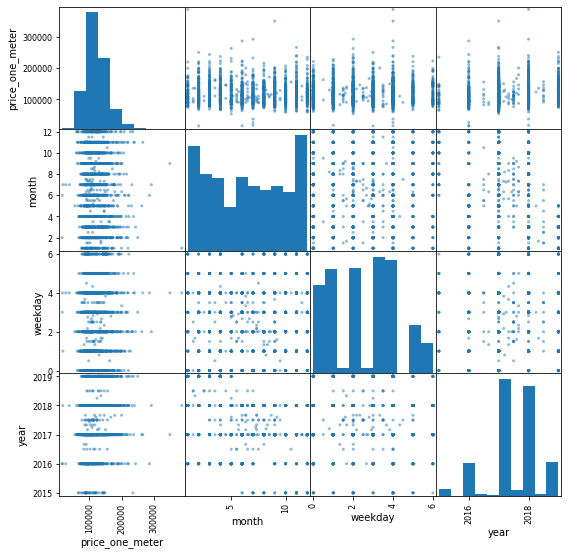

In [82]:
# посмотрим на зависимость цены от публикации объявления
spb_stat_multi = spb_estate_center.pivot_table(index='price_one_meter', values=['weekday', 'month', 'year'], 
                                               aggfunc='mean').reset_index()
print(spb_stat_multi.corr())
pd.plotting.scatter_matrix(spb_stat_multi, figsize=(9, 9));

Изучим диаграмму рассеяния для всех величин.
- в верхней левой ячейке связь цены с ценой. Это не диаграмма рассеяния, а обычная гистограмма. Видно, что самай высокая цена была в 2017 и в начале 2018 году.
- в ячейке ниже: связь цены и месяца. Можно увидеть, что в начале и конце года цены выше, чем в середине.
- в ячейке ниже: связь цены и дня недели. Можно увидеть, что в среду и пятницу самые высокие цены, а в выходные самые низкие.
- год и цена: в 2017 году недвижимость стала стоить немного дороже, чем в 2016 году. Видно, что год от года цена на недвижимость постепенно увеличивается.
- гистограмма месяца (month) сообщает, что больше всего объявлений публикуется в начале и конце года.
- гистограмма дня недели (weekday) сообщает, что больше всего объявлений публикуется в будние дни (0 - 4).
- гистограмма года (year) имеет два пика: 2017 и 2018 год.
- по другую сторону диагонали зеркально расположились те же данные, только оси поменялись местами. 

Коэффициенты корреляции по этим параметрам незначительные, что свидетельствует от очень слабой связи между данными параметрами либо вообще о полном её отсутствии. Самая большая корреляция между ценой и годом публикации 0,14, это подтверждает наш вывод о том, что цены на недвижимость медленно, но верно растут.

### Общий вывод

В ходе проекта мы очистили данные, добавили столбцы, необходимые для следующего анализа и вывели закономерности.

Построили гистограммы для площади, цены, числа комнат, высоты потолков для квартир во всей Лен. области и в центре Питера.

Теперь мы можем с уверенностью сказать, что в центре Питера квартиры не только дороже, но и больше, не только по метражу, но и по количеству комнат, а потолки выше.

И для Лен. области и для центра Питера правдиво утверждение, что цена за квадратный метр зависит от количества комнат. Чем меньше комнат, тем выше ценник. В центре Питера корреляция по этому признаку более устойчивая.

Для квартир в области верно утверждение, что тем ближе к центру, тем выше цена за квадратный мерт. Но мы не можем сказать того же самого про центр Питера. Там это правило не работает.

Взаимосвязи между датой публикации объявления о продаже квартиры и ценой не выявлено ни для Санкт-Петербурга, ни для Лен. области. Единственное, что прослеживается - это медленный рост цен на недвижимость с течением времени.

Самые высокие цены на недвижимость разумеется в Санкт-Петербурге и Пушкине, а самое дешёвое жильё можно приобрести в Выборге.